# ***Comments:***

# *1. Bar Charts ticks are not clear.*

# *2. Dataset doesnt have null values , why imputed by mean and mode.*

# *3. most of the visulization doesn have explanation*

**Loading Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Loading the dataset**

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"najlla","key":"eb8d6bc743fb69460fceded6d1c837b4"}'}

In [ ]:
# install kaggle
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mexwell/student-scores

Dataset URL: https://www.kaggle.com/datasets/mexwell/student-scores
License(s): other
  0% 0.00/61.9k [00:00<?, ?B/s]
100% 61.9k/61.9k [00:00<00:00, 77.3MB/s]


In [ ]:
!unzip student-scores.zip
!ls

Archive:  student-scores.zip
  inflating: student-scores.csv      
kaggle.json  sample_data  student-scores.csv  student-scores.zip


In [ ]:
# import pandas library.
import pandas as pd

# Read the the dataset using read_csv method.
stud_score_df= pd.read_csv('/content/student-scores.csv')

# Return the first 5 rows of the DataFrame.
stud_score_df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


**1.** **Initial** **Exploration**

**Checking Shape of the dataset**




Explanation:
The shape attribute of the DataFrame is used to view its dimensions, returning the number of rows and columns. In this case, the stud_score_df DataFrame has 2000 rows and 17 columns.

In [ ]:
# Viewing the shape of the DataFrame
print("Shape of the DataFrame:")
print(stud_score_df.shape)

Shape of the DataFrame:
(2000, 17)


**Checking Data**

Explanation: The provided code counts and prints the number of numerical and categorical columns in a DataFrame. It finds 3 numerical columns and 3 categorical columns in the salary_df DataFrame.

In [ ]:
# Counting numerical columns
numerical_columns = stud_score_df.select_dtypes(include=['int64', 'float64']).columns
num_numerical_columns = len(numerical_columns)

# Counting categorical columns
categorical_columns = stud_score_df.select_dtypes(include=['object', 'category']).columns
num_categorical_columns = len(categorical_columns)

# Printing the counts
print("Number of numerical columns:", num_numerical_columns)
print("Number of categorical columns:", num_categorical_columns)

Number of numerical columns: 10
Number of categorical columns: 5


Explanation: The info() method provides a concise summary of the stud_score_df DataFrame, indicating it has 2000 entries and 17 columns, with 10 columns of type float64 and 5 of type object.

In [ ]:
# Using info() to get a concise summary of the DataFrame
print("DataFrame information:")
stud_score_df.info()

DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score          

**Summary Statistics**

Explanation: The describe() method provides summary statistics for the numeric columns in the stud_score_df DataFrame. For Id, absence_days,  weekly_self_study_hours, math_score, history_score, physics_score, chesmistry_score, biology_score, english_score and geography_score it includes the count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values. This gives a detailed overview of the distribution and central tendencies of the numeric data.

In [ ]:
# Checking summary statistics of numeric columns in the DataFrame
numeric_summary_statistics = stud_score_df.describe()
print("Summary statistics of numeric columns:")
numeric_summary_statistics

Summary statistics of numeric columns:


,id,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1000.500000,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000
std,577.494589,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705
min,1.000000,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000
25%,500.750000,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000
50%,1000.500000,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000
75%,1500.250000,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000
max,2000.000000,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000


Explanation: The describe(include='object') method provides summary statistics for the categorical columns in the stud_score_df DataFrame. It includes the count, number of unique values, most frequent value (top), and the frequency of the most frequent value (freq) for Firstname, Lastname, Email, Gender and career_aspiration. This shows that:

1. First_name has 453 unique values, with "Michael" being the most frequent (40 times).
2. Last_name has 707 unique values, with "Smith" being the most frequent (41 times).
3. Email has 2000 unique values, with "paul.casey.1@gslingacademy.com	" being the most frequent (1 times).
4. Gender has 2 unique values with "Female" being the most frequent (1002 times)
5. Career_aspiration has 17 unique values with "Software Engineer" being the most frequent (315 times)

In [ ]:
# Checking summary statistics of categorical columns in the DataFrame
categorical_summary = stud_score_df.describe(include='object')
print("Summary statistics of categorical columns:")
categorical_summary

Summary statistics of categorical columns:


,first_name,last_name,email,gender,career_aspiration
count,2000,2000,2000,2000,2000
unique,453,707,2000,2,17
top,Michael,Smith,paul.casey.1@gslingacademy.com,female,Software Engineer
freq,40,41,1,1002,315


**Checking Duplicate Values**

Explanation: The duplicated() method of pandas, combined with the sum() method, is used to count the number of duplicate rows in a DataFrame.

In [ ]:
# Checking for duplicate values
duplicate_rows = stud_score_df.duplicated().sum()

# Printing the count of duplicate rows
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


**Checking Null Values**

Explanation: The code calculates the count of null values in each column of the stud_score_df DataFrame using the isnull() method, which returns a DataFrame of boolean values indicating where the null values are located, and then the sum() method is applied to count them. It prints the count of null values for each column, showing that there are no null values in any column in stud_score DataFrame.

In [ ]:
# Count of null values in each column
null_counts = stud_score_df.isnull().sum()
print("Count of null values in each column:")
print(null_counts)

Count of null values in each column:
id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64


**Heatmap of NULL Values**

NOTE:

Since there are no null values in any column, they might not be easily noticeable in a heatmap representation.

# *data has no null valus why you add this comment*

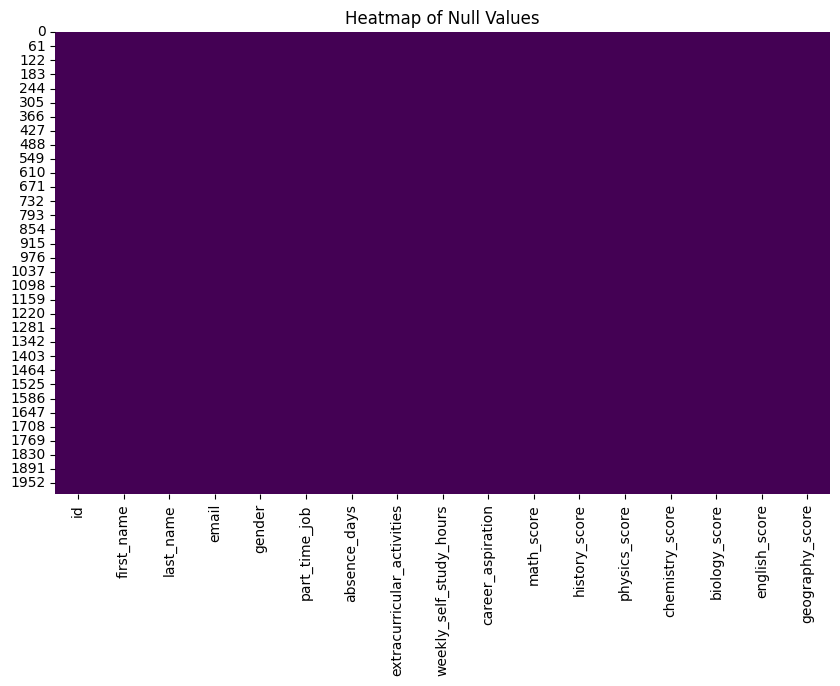

In [ ]:
# Create a heatmap for null values
plt.figure(figsize=(10, 6))
sns.heatmap(stud_score_df.isnull(), cmap='viridis', cbar=False)
plt.title('Heatmap of Null Values')
plt.show()

**Other method for visualizing Null values**

<Axes: >

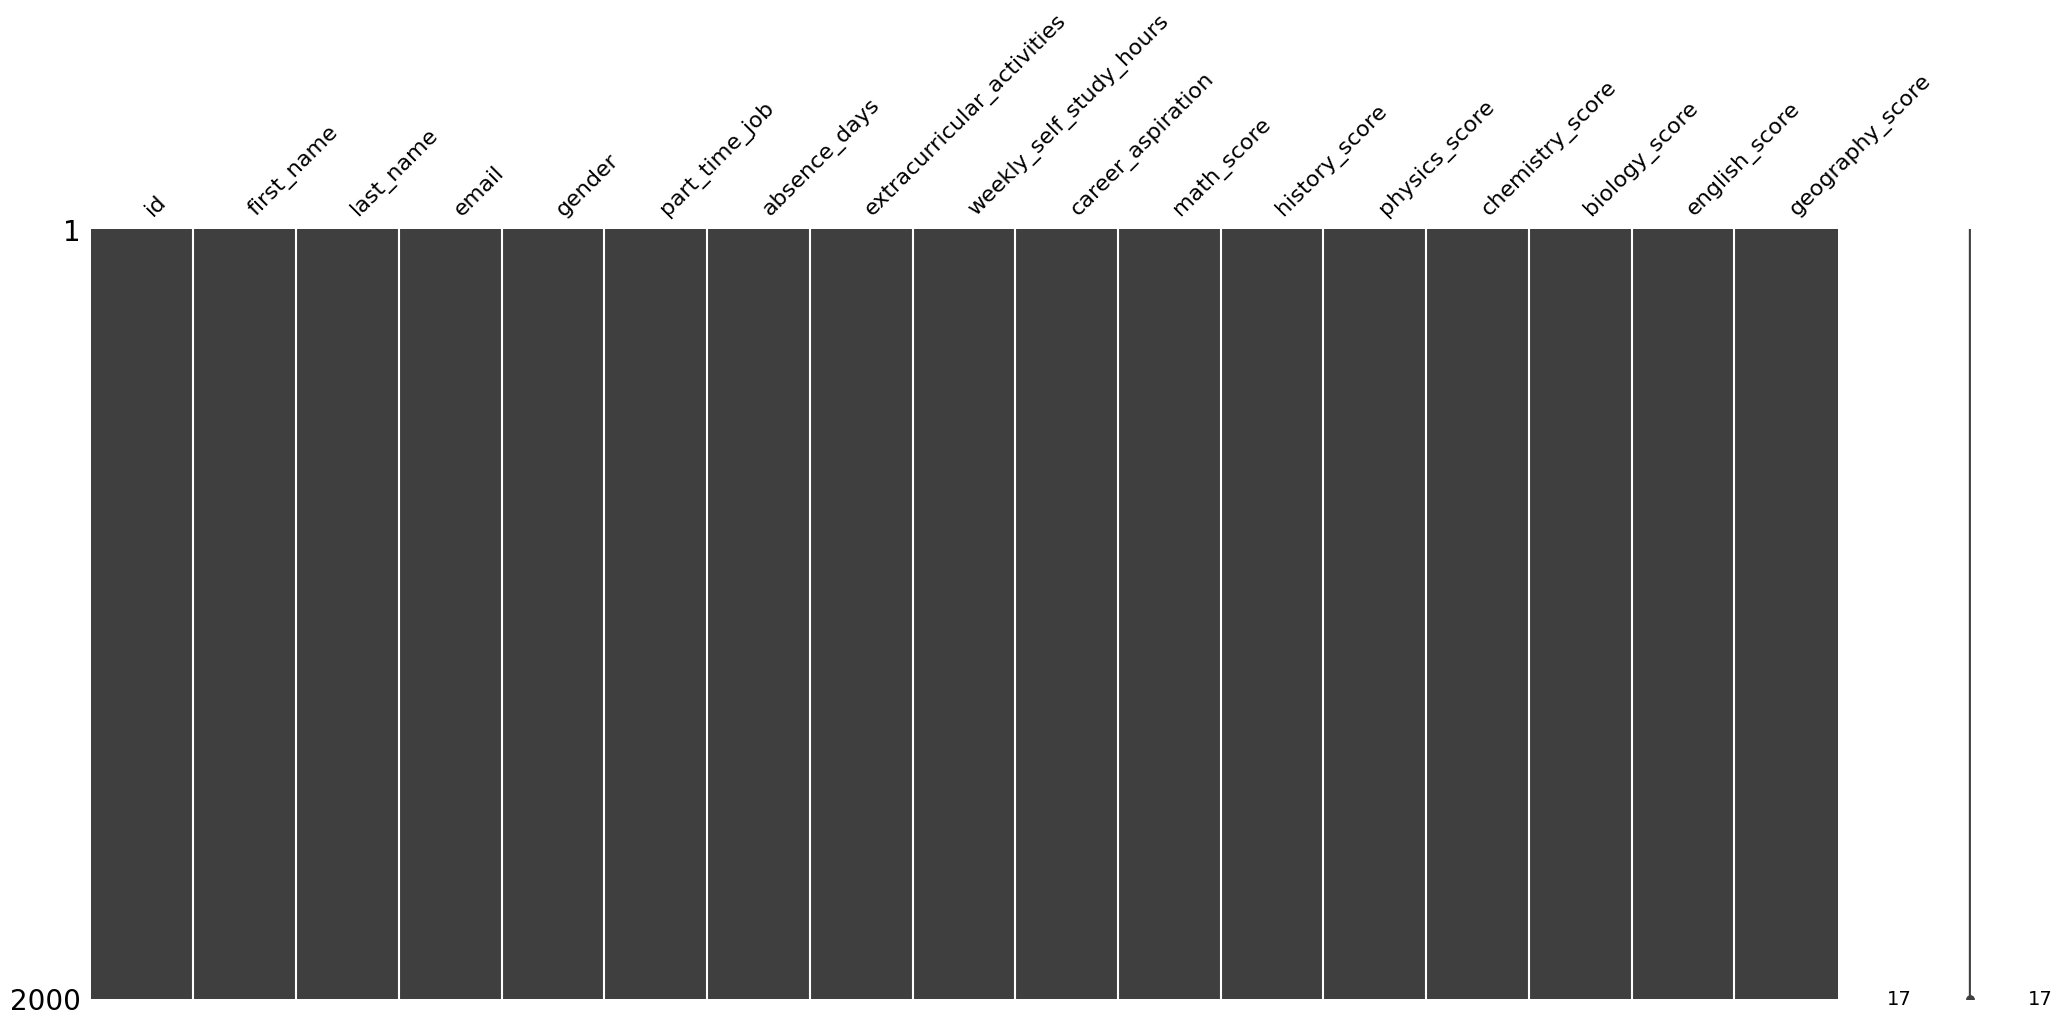

In [ ]:

import missingno as msno

# Visualizing missing values
msno.matrix(stud_score_df)

**2. Exploratory Data Analysis (EDA)**

**Histograms for all numerical columns**

Explanation: This code first selects all numerical columns from the DataFrame and then plots histograms for each numerical column. The histograms visualize the distribution of numerical data, providing insights into the ranges and frequencies of values in each column.

# *no need for visulization of ID column*

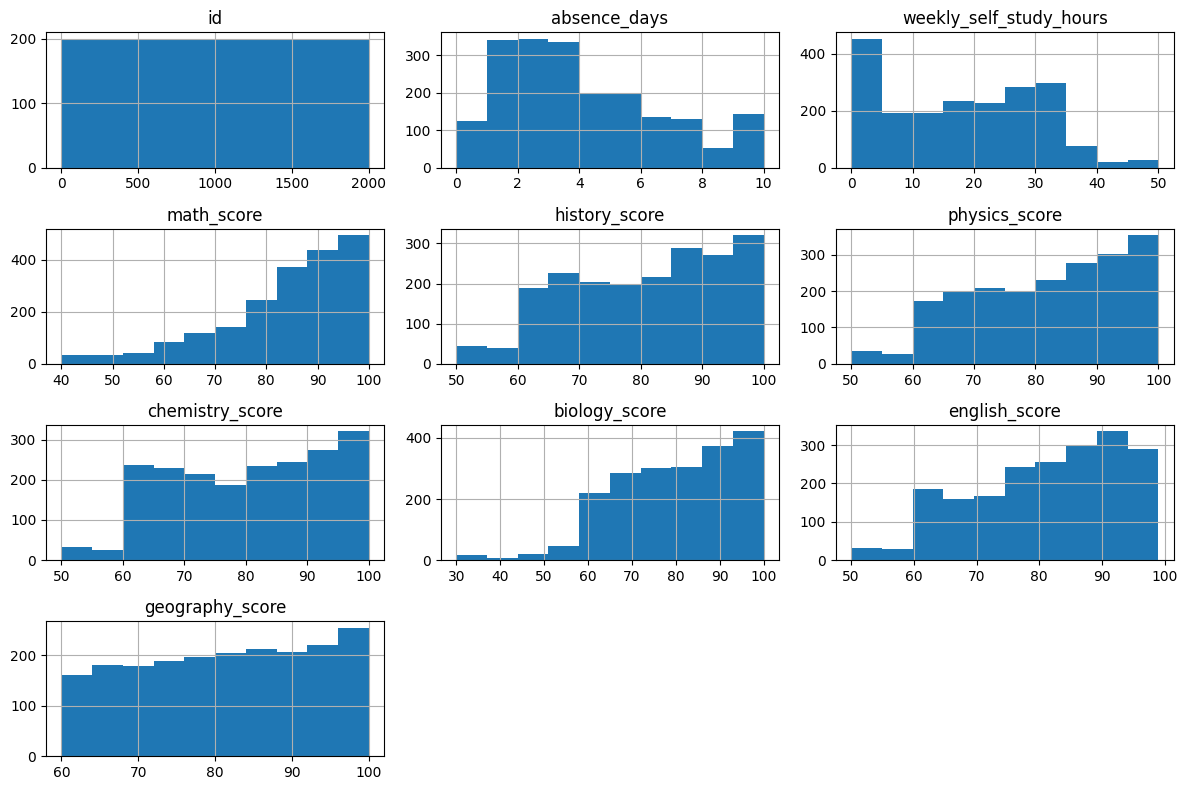

In [ ]:
# Selecting numerical columns
numerical_columns = stud_score_df.select_dtypes(include=['int64', 'float64'])

# Plotting histograms for each numerical column
numerical_columns.hist(figsize=(12, 8))
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

**Box plots of numerical columns**

Explanation:
A box plot, also known as a box-and-whisker plot, is a graphical representation of the distribution of a dataset. It provides a concise way to visualize the central tendency, spread, and skewness of the data along with identifying any potential outliers.

# *no need for visulization of ID column*

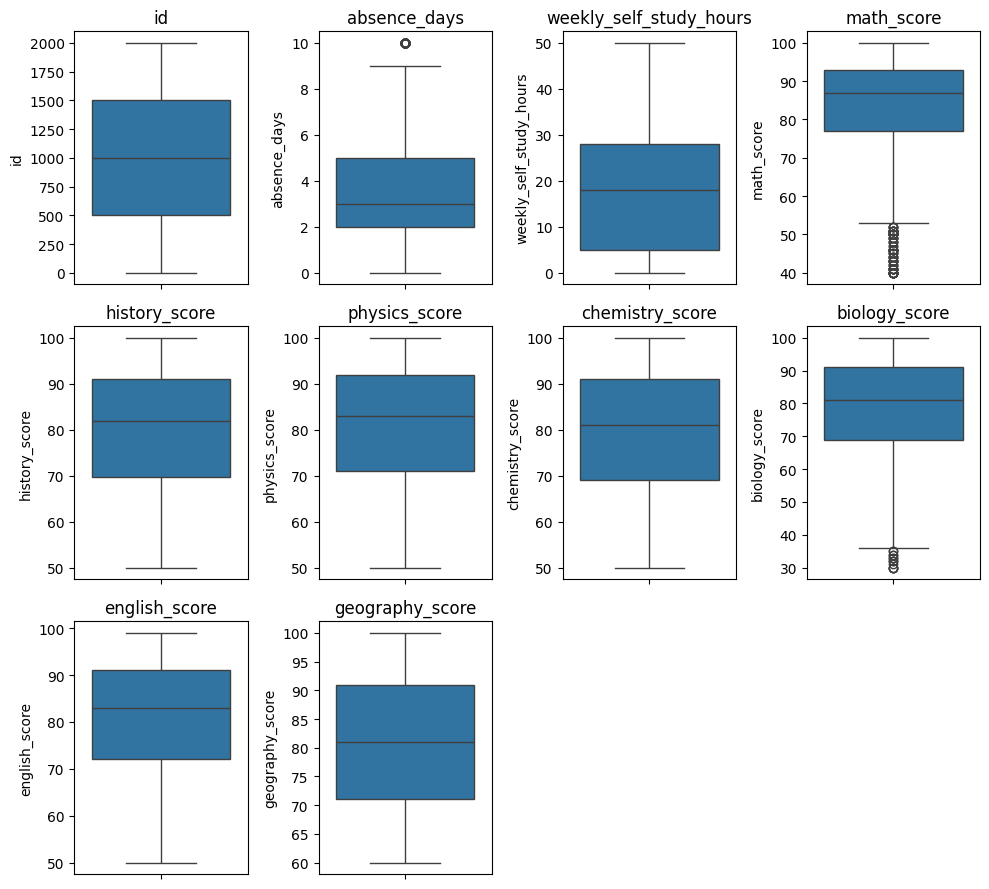

In [ ]:
# Draw box plots of numerical columns using subplots
numeric_cols = stud_score_df.select_dtypes(include=['int64', 'float64']).columns


# Adjusting the subplot grid size to accommodate all numeric columns
num_cols = len(numeric_cols)
num_rows = (num_cols // 4) + (1 if num_cols % 4 else 0)  # Adjust the number of rows in the grid

plt.figure(figsize=(10, num_rows * 3))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, 4, i)
    sns.boxplot(data=stud_score_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

**Bar charts for all categorical columns**

Explanation:
Uses rectangular bars to represent data.

# *Ticks are not clear*  

# *no need for visulization of firstnam , lastname, email*

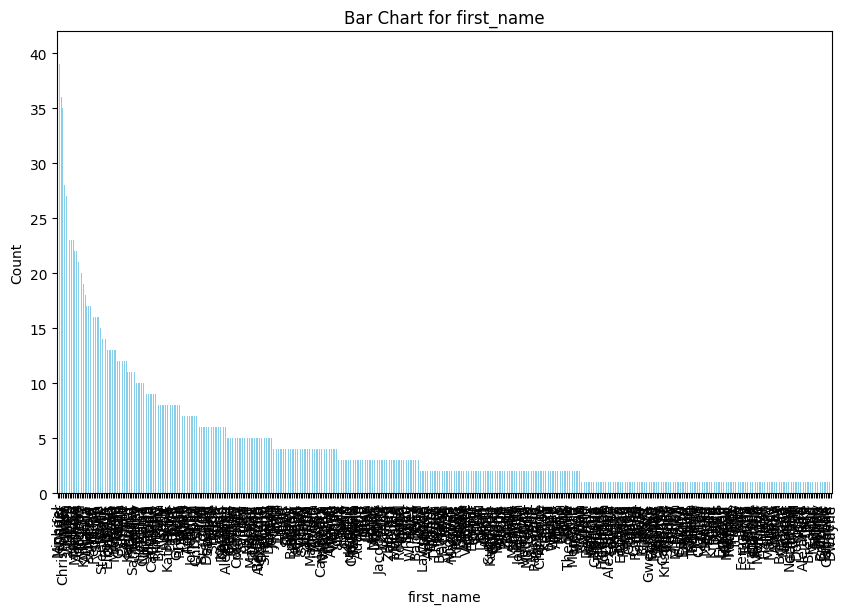

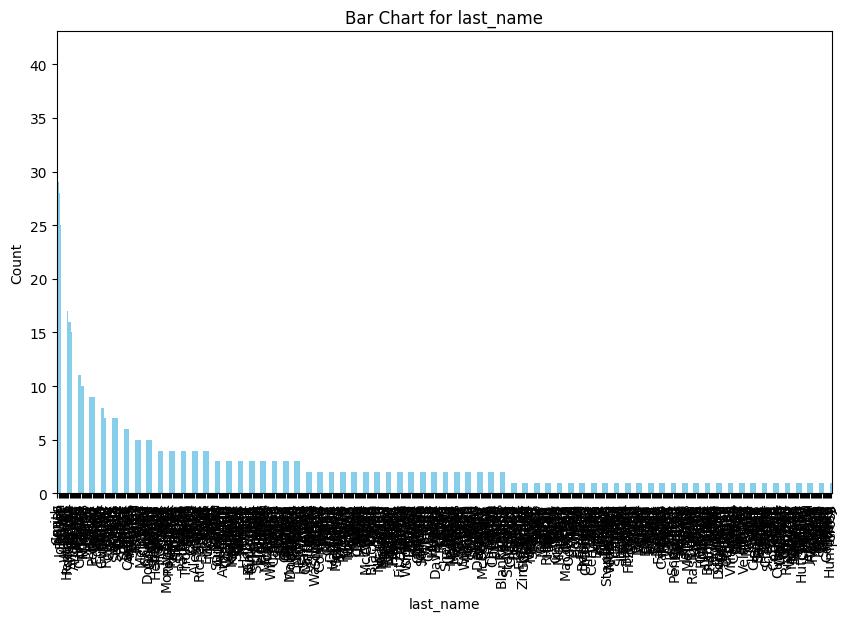

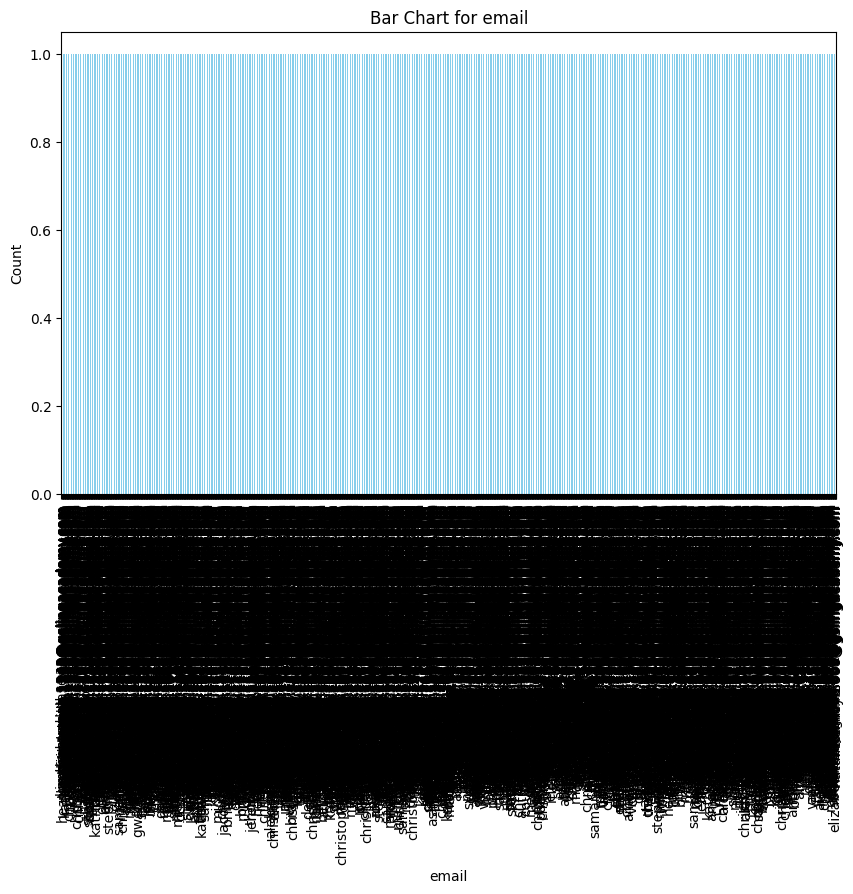

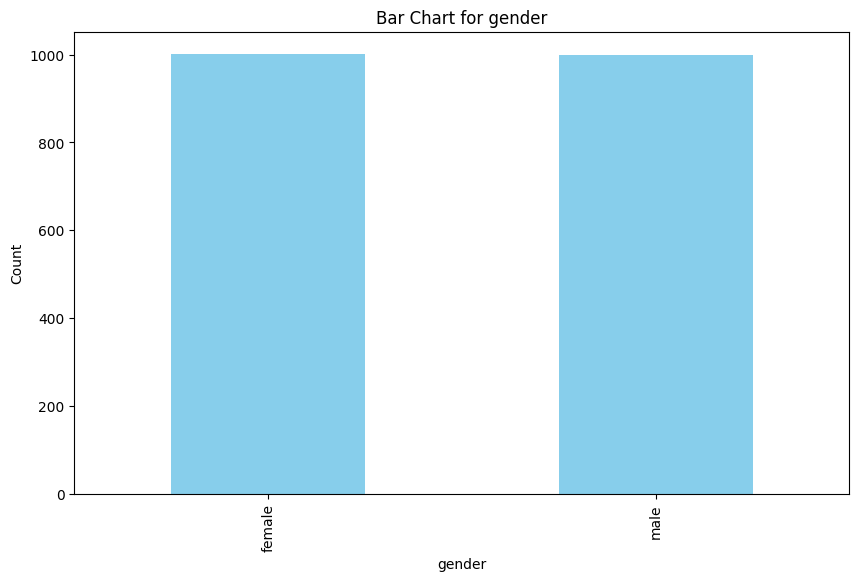

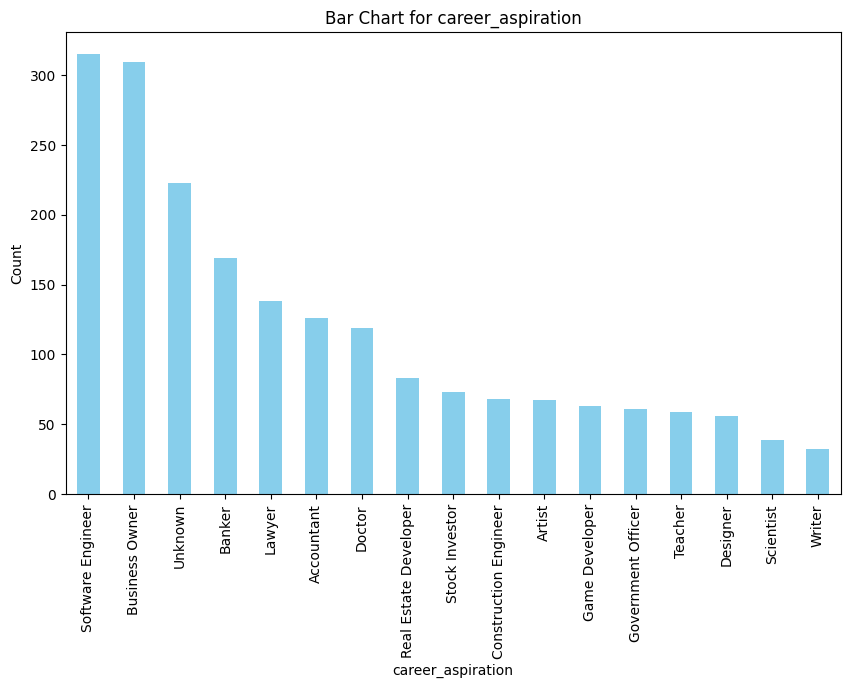

In [ ]:
# Selecting categorical columns
categorical_columns = stud_score_df.select_dtypes(include=['object'])

# Plotting bar charts for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    stud_score_df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Bar Chart for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate x-labels for better readability
    plt.show()


**Scatter Plot for Average Score vs. Weekly Self Study Hours:**

In [ ]:
# Adding new columns to the dataframe and finding average score for each student

stud_score_df["total_score"] = stud_score_df["math_score"] + stud_score_df["history_score"] + stud_score_df["physics_score"] + stud_score_df["chemistry_score"] + stud_score_df["biology_score"] + stud_score_df["english_score"] + stud_score_df["geography_score"]
stud_score_df["average_score"] = stud_score_df["total_score"] / 7
stud_score_df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,total_score,average_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,574,82.000000
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90,640,91.428571
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,605,86.428571
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86,551,78.714286
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76,521,74.428571


In [ ]:
stud_score_df.head()

,id,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


Explanation: The scatter plot illustrates the relationship between Average Score and Weekly Self Study Hours, indicating that higher scores are typically associated with more weekly self study hours, portraying a positive trend. The correlation coefficient (0.50) reinforces this finding, denoting a strong positive linear relationship between Average Score and Weekly Self Study Hours, affirming that as Weekly Self Study Hours rises, Average Score tends to increase proportionally.

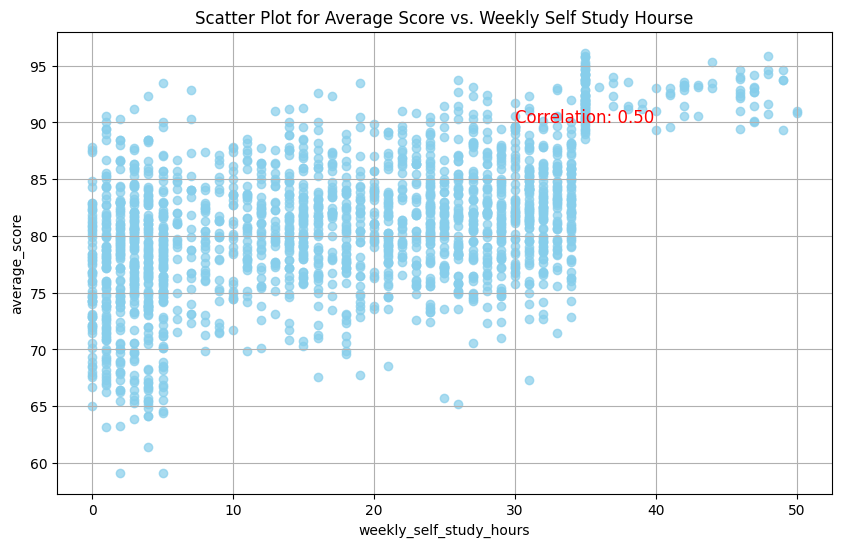

Correlation Coefficient (Average Score vs. Weekly Self Study Hours): 0.5015199798379675


In [ ]:
# Calculate correlation coefficient
correlation_coefficient = stud_score_df['weekly_self_study_hours'].corr(stud_score_df['average_score'])

# Scatter plot for Average score vs. Self study hours with correlation
plt.figure(figsize=(10, 6))
plt.scatter(stud_score_df['weekly_self_study_hours'], stud_score_df['average_score'], color='skyblue', alpha=0.7)
plt.title('Scatter Plot for Average Score vs. Weekly Self Study Hourse')
plt.xlabel('weekly_self_study_hours')
plt.ylabel('average_score')
plt.grid(True)

# Adding correlation coefficient as text to the plot
correlation_text = f'Correlation: {correlation_coefficient:.2f}'
plt.text(30, 90, correlation_text, fontsize=12, color='red')

plt.show()

# Print correlation coefficient
print("Correlation Coefficient (Average Score vs. Weekly Self Study Hours):", correlation_coefficient)

**Violin Plot for Career Aspiration Distribution by Gender**

Explanation: This code will generate a violin plot that visually represents the distribution of Career Aspiration for Gender, male and female.

<ipython-input-21-cdb682d19d26>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gender', y='career_aspiration', data=stud_score_df, palette='muted')


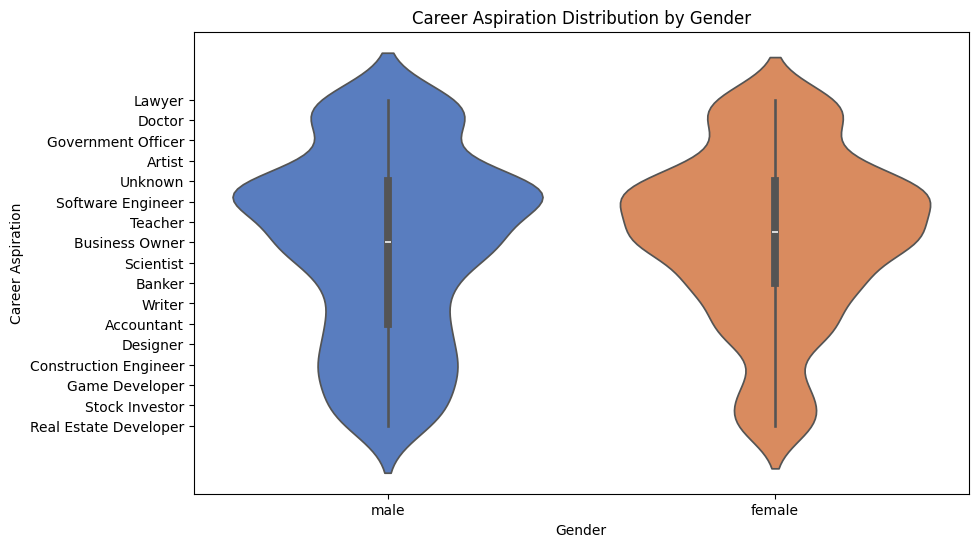

In [ ]:
# Violin plot for Career Aspiration Distribution by Gender
plt.figure(figsize=(10, 6))
sns.violinplot(x='gender', y='career_aspiration', data=stud_score_df, palette='muted')
plt.title('Career Aspiration Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Career Aspiration')
plt.show()

**Pie Chart of Gender**

Explanation: This code will generate a pie chart that visually represents the distribution of male and female in the dataset.

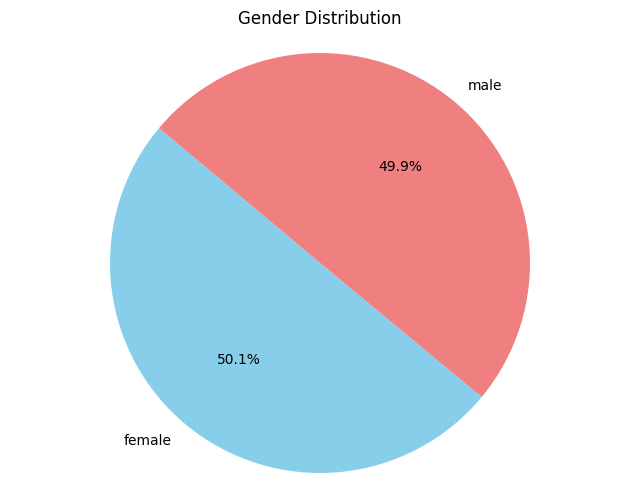

In [ ]:

# Calculate the count of male and female
gender_counts = stud_score_df['gender'].value_counts()

# Calculate the percentage of each gender category
gender_percentage = gender_counts / gender_counts.sum() * 100

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_percentage, labels=gender_percentage.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

**Stacked Bar Chart of Career Aspiration Distribution by Gender**

Explanation:

1. Grouping and Counting:

The code groups the DataFrame by 'Gender' and 'Career Aspiration' using groupby, then counts the occurrences of each combination. The unstack method is used to convert the counts into a DataFrame format where the index is 'Gender' and the columns are 'Career Aspiration'.
2. Creating the Stacked Bar Chart:

The plot method with kind='bar' and stacked=True creates a stacked bar chart. Each bar represents a gender, and within each bar, segments represent the counts of different Career Aspiration. The colormap='viridis' adds a color scheme for better visualization.

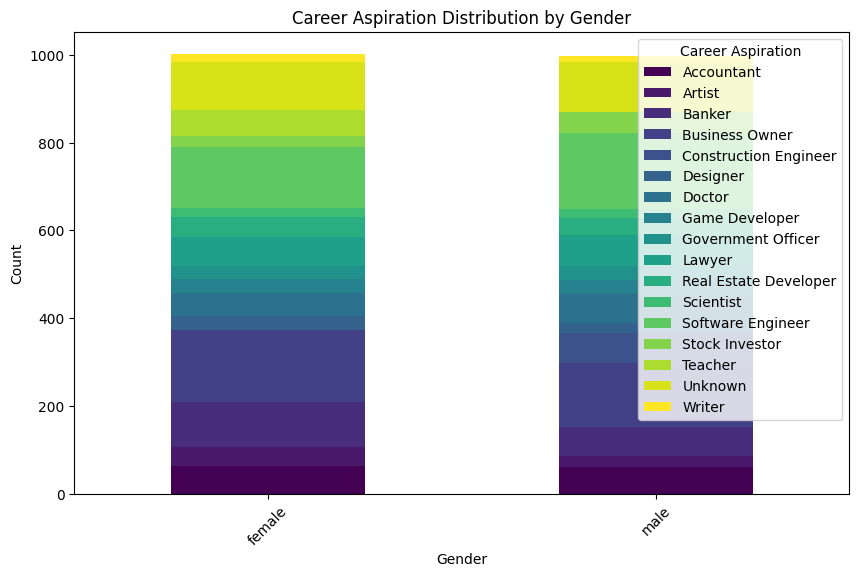

In [ ]:
# Count of career aspiration by Gender
career_aspiration_counts = stud_score_df.groupby(['gender', 'career_aspiration']).size().unstack()

# Plotting the stacked bar chart
career_aspiration_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Career Aspiration Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Career Aspiration')
plt.xticks(rotation=45)
plt.show()

**Calculating the gender split**

In [ ]:
stud_score_df['gender'].value_counts()

gender
female    1002
male       998
Name: count, dtype: int64

Text(0.5, 1.0, 'Pct of Students Students')

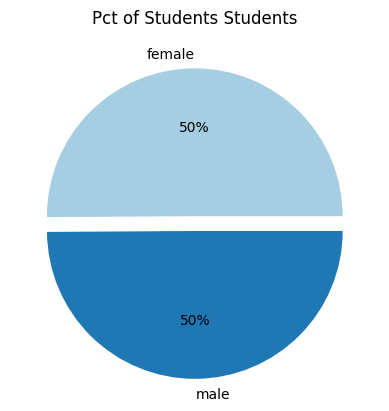

In [ ]:
gender_data = [1002,998]
keys = ['female','male']
explode = [0, 0.1]
palette_color = sns.color_palette('Paired')
plt.pie(gender_data, labels=keys,  colors = palette_color,
        explode=explode, autopct='%1.0f%%')
plt.title('Pct of Students Students')

**Percentage of the population that engages in extracurricular activities**

In [ ]:
stud_score_df['extracurricular_activities'].value_counts()

extracurricular_activities
False    1592
True      408
Name: count, dtype: int64

Text(0.5, 1.0, 'Pct of Students with Extracurricular activities')

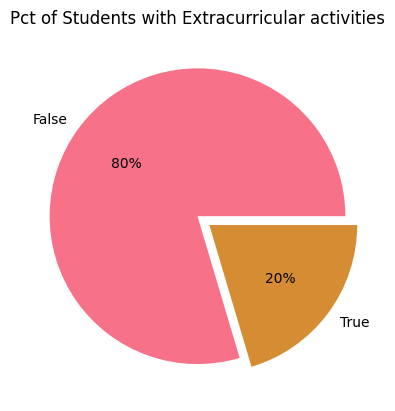

In [ ]:
xtra_data = [1592,408]
keys = ['False','True']
explode = [0, 0.1]
palette_color = sns.color_palette("husl", 9)
plt.pie(xtra_data, labels=keys,  colors = palette_color,
        explode=explode, autopct='%.00f%%')
plt.title('Pct of Students with Extracurricular activities')

**Percentage of the population that engages in Part time Jobs**

Text(0.5, 1.0, 'Pct of Students with Part time jobs')

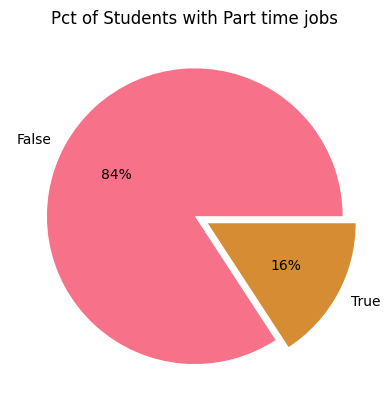

In [ ]:
stud_score_df['part_time_job'].value_counts()

partime = stud_score_df['part_time_job'].value_counts().index.tolist()
partime_cts = stud_score_df['part_time_job'].value_counts()
explode = [0, 0.1]
plt.pie(partime_cts, labels=partime,  colors = palette_color,
        explode=explode, autopct='%.00f%%')
plt.title('Pct of Students with Part time jobs')

**Time engagd outside of school distribution**

# *Why you add day title for x axes for weekly_self_study*
-hours

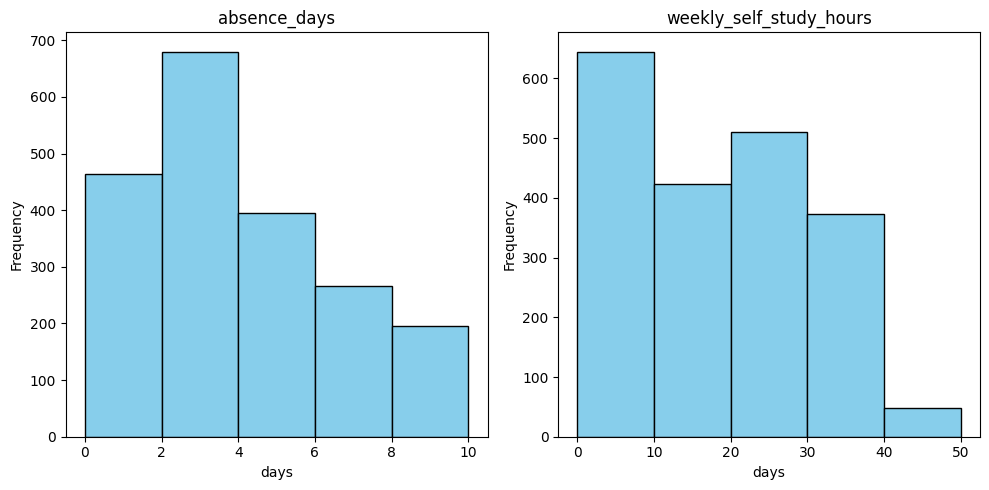

In [ ]:
extra_info = ['absence_days','weekly_self_study_hours']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes_flat = axes.flatten()
for i, subject in enumerate(extra_info):
    ax = axes_flat[i]
    ax.hist(stud_score_df[subject], bins=5, color='skyblue', edgecolor='black')
    ax.set_title(subject)
    ax.set_xlabel('days')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

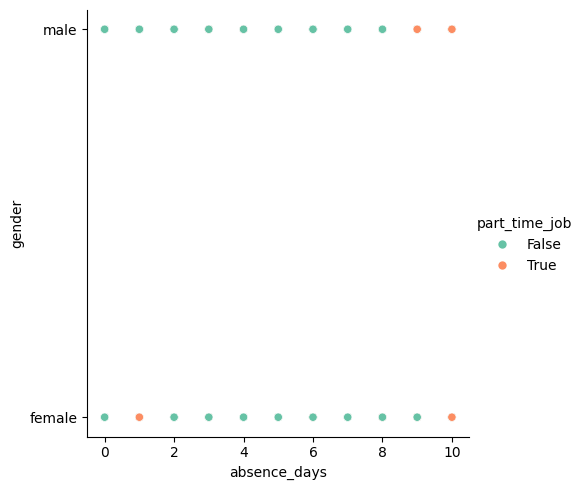

In [ ]:
sns.relplot(stud_score_df,x='absence_days',y='gender',hue='part_time_job',palette="Set2")

**Popular Career Aspirations**

<Axes: ylabel='career_aspiration'>

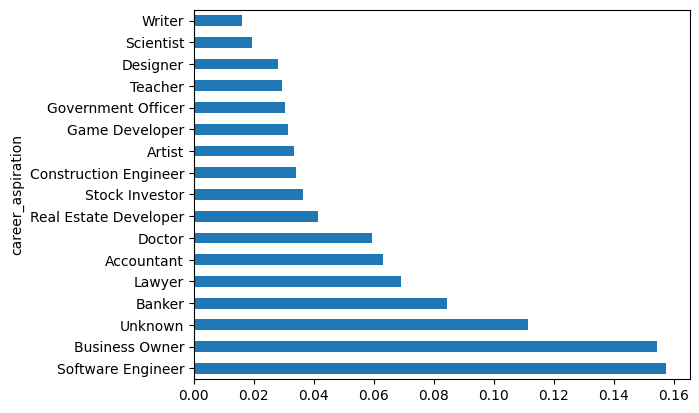

In [ ]:
stud_score_df['career_aspiration'].value_counts(normalize=True).plot(kind='barh')


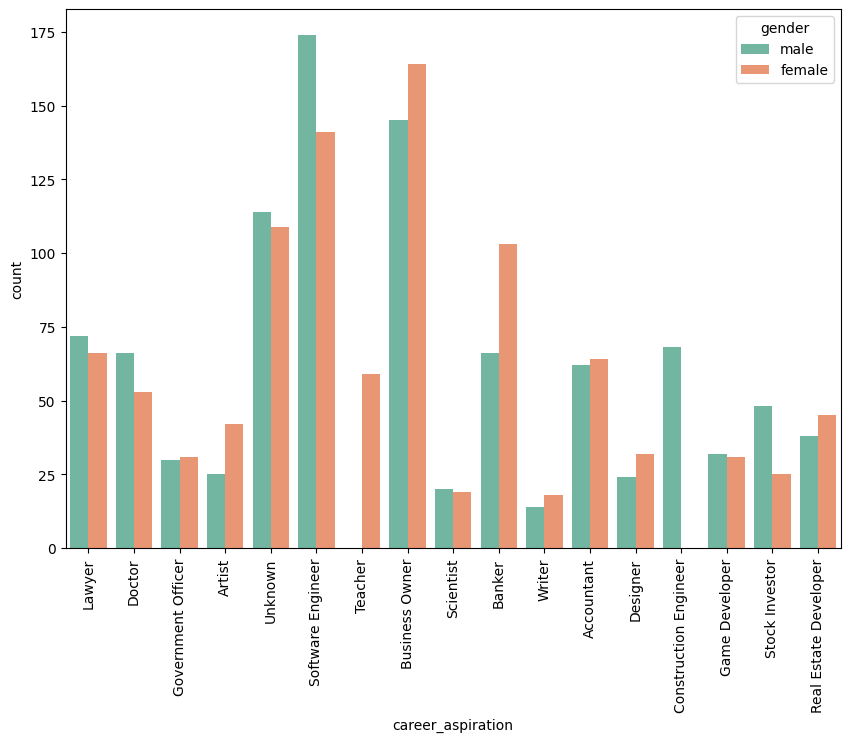

In [ ]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(stud_score_df, x="career_aspiration", hue="gender",palette='Set2')
ax.tick_params(axis='x', labelrotation=90)

Explanation:
16% of the students want to pursue a career in software engineering and at the bottom aspirations in Science and Writing
It is also noticeable that only female students are considering a career in teaching and might explain why the avg in English is better. On the other hand only male students want to be involved in construction.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Lawyer'),
  Text(1, 0, 'Doctor'),
  Text(2, 0, 'Government Officer'),
  Text(3, 0, 'Artist'),
  Text(4, 0, 'Unknown'),
  Text(5, 0, 'Software Engineer'),
  Text(6, 0, 'Teacher'),
  Text(7, 0, 'Business Owner'),
  Text(8, 0, 'Scientist'),
  Text(9, 0, 'Banker'),
  Text(10, 0, 'Writer'),
  Text(11, 0, 'Accountant'),
  Text(12, 0, 'Designer'),
  Text(13, 0, 'Construction Engineer'),
  Text(14, 0, 'Game Developer'),
  Text(15, 0, 'Stock Investor'),
  Text(16, 0, 'Real Estate Developer')])

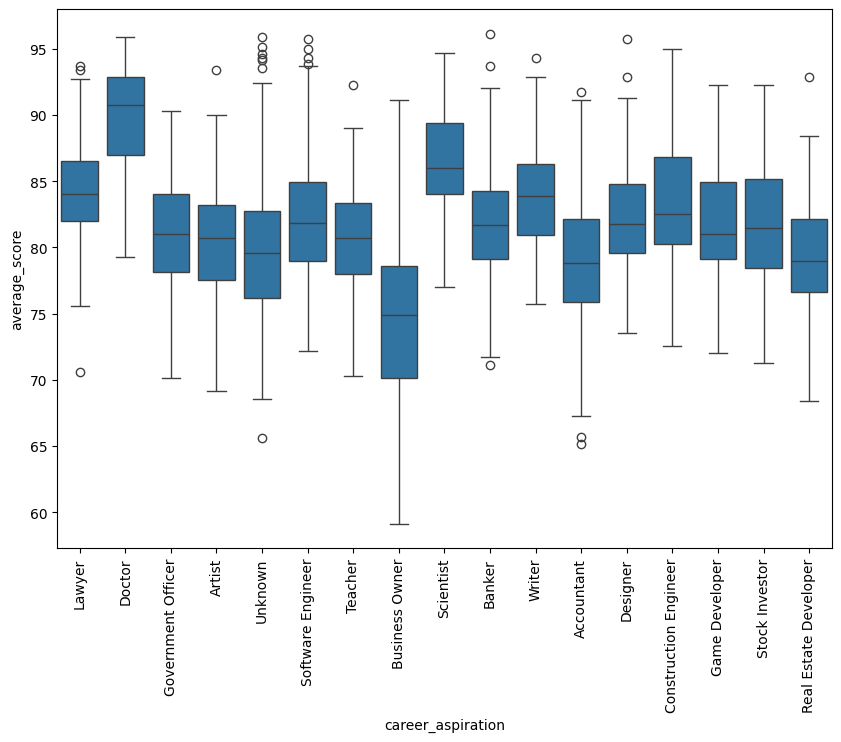

In [ ]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x='career_aspiration',y='average_score',data=stud_score_df)
plt.xticks(rotation=90)


Explanation:
Scores by career aspiration show that students who want to become doctors have higher score than the resto of the class, alongside with students who are pursuing careers in STEM

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Lawyer'),
  Text(1, 0, 'Doctor'),
  Text(2, 0, 'Government Officer'),
  Text(3, 0, 'Artist'),
  Text(4, 0, 'Unknown'),
  Text(5, 0, 'Software Engineer'),
  Text(6, 0, 'Teacher'),
  Text(7, 0, 'Business Owner'),
  Text(8, 0, 'Scientist'),
  Text(9, 0, 'Banker'),
  Text(10, 0, 'Writer'),
  Text(11, 0, 'Accountant'),
  Text(12, 0, 'Designer'),
  Text(13, 0, 'Construction Engineer'),
  Text(14, 0, 'Game Developer'),
  Text(15, 0, 'Stock Investor'),
  Text(16, 0, 'Real Estate Developer')])

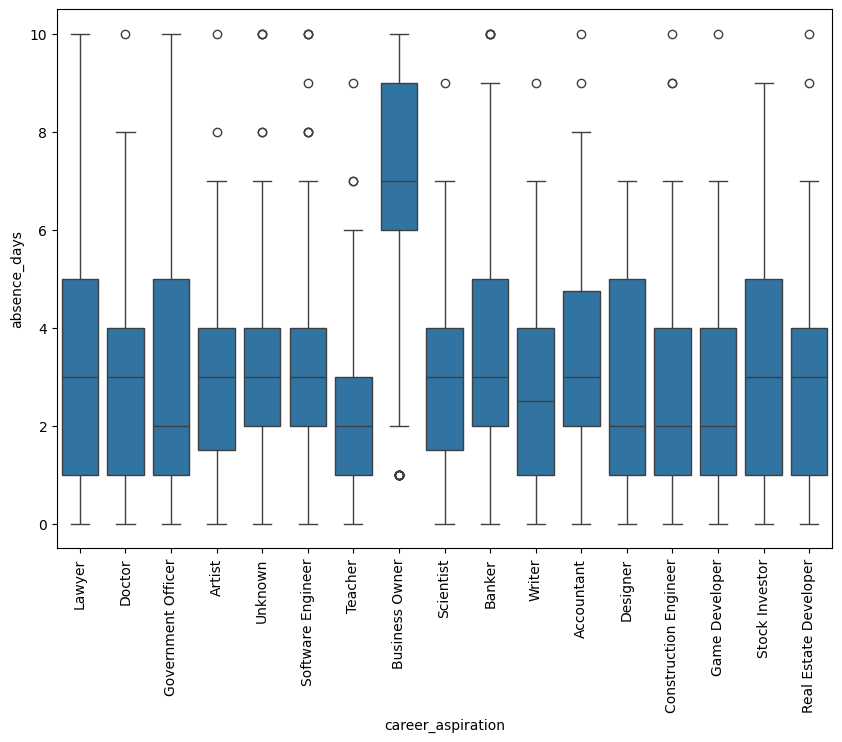

In [ ]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x='career_aspiration',y='absence_days',data=stud_score_df)
plt.xticks(rotation=90)

Explanation:
This graph shows that the students who are pursuing a future as business owners tend to be more abscent at school, this is perhaps as they already are involved in a family business, but without further information it's just speculative

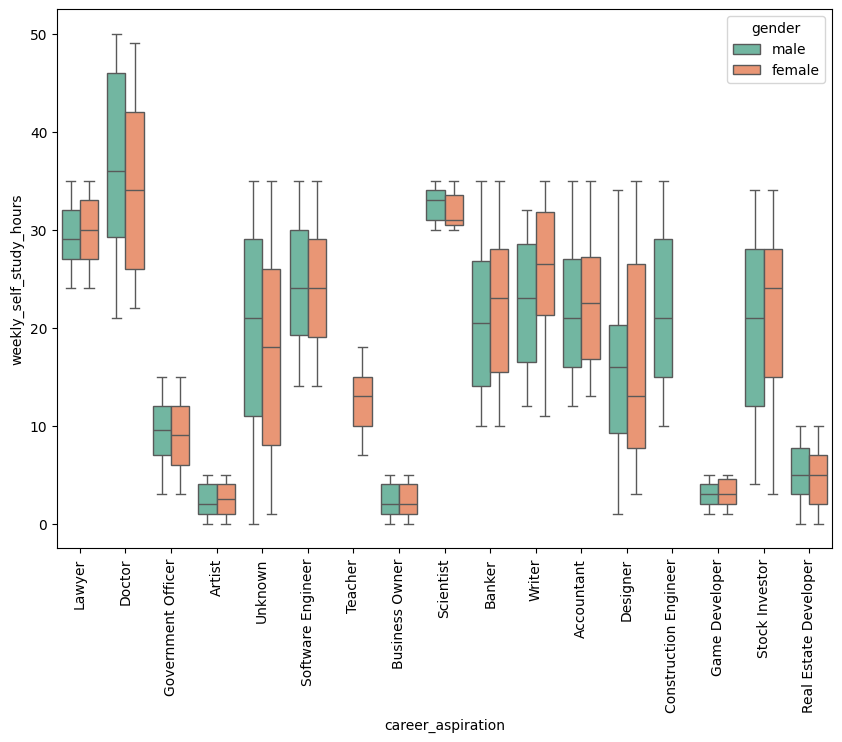

In [ ]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x='career_aspiration',y='weekly_self_study_hours',hue='gender',data=stud_score_df,palette="Set2")
plt.xticks(rotation=90)
plt.show()


Explanation:
This graph shows a clear relation between the students with aspirations in STEM to be more involved with self-study time, and it shows that students with aspirations in business ownership are not really interested in self-study.

**3. Correlation Matrix**

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is typically between -1 and 1.

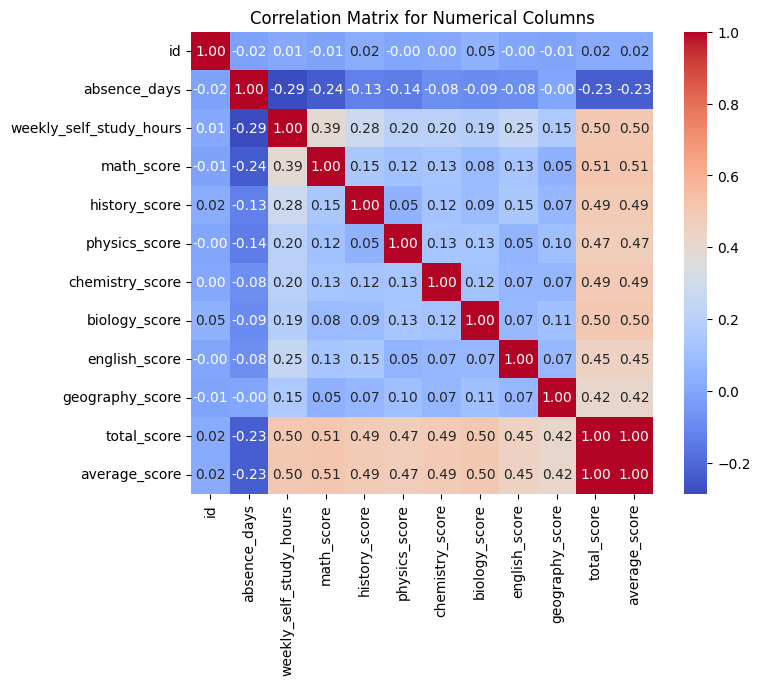

In [ ]:
# Selecting only numerical columns
numeric_cols = stud_score_df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix for numerical columns only
correlation_matrix = stud_score_df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

**4.Data Preprocessing**

Drop Duplicate Values

In [ ]:
# Drop duplicate rows
salary_df = stud_score_df.drop_duplicates()

# Print the DataFrame after dropping duplicates
print("DataFrame after dropping duplicates:")
print(stud_score_df)

DataFrame after dropping duplicates:
        id first_name last_name                                    email  \
0        1       Paul     Casey           paul.casey.1@gslingacademy.com   
1        2   Danielle  Sandoval    danielle.sandoval.2@gslingacademy.com   
2        3       Tina   Andrews         tina.andrews.3@gslingacademy.com   
3        4       Tara     Clark           tara.clark.4@gslingacademy.com   
4        5    Anthony    Campos       anthony.campos.5@gslingacademy.com   
...    ...        ...       ...                                      ...   
1995  1996       Alan  Reynolds     alan.reynolds.1996@gslingacademy.com   
1996  1997     Thomas   Gilbert    thomas.gilbert.1997@gslingacademy.com   
1997  1998    Madison     Cross     madison.cross.1998@gslingacademy.com   
1998  1999   Brittany   Compton  brittany.compton.1999@gslingacademy.com   
1999  2000    Natalie     Smith     natalie.smith.2000@gslingacademy.com   

      gender  part_time_job  absence_days  extracu

**Handling Missing / Null Values**

First method: Drop null values

The code drops any rows containing null values from the DataFrame stud_score_df and prints the DataFrame without those null-containing rows (not recommending).

In [ ]:
# Dropping rows with null values
salary_df = stud_score_df.dropna()

# Print the DataFrame after dropping null values
print(stud_score_df)

        id first_name last_name                                    email  \
0        1       Paul     Casey           paul.casey.1@gslingacademy.com   
1        2   Danielle  Sandoval    danielle.sandoval.2@gslingacademy.com   
2        3       Tina   Andrews         tina.andrews.3@gslingacademy.com   
3        4       Tara     Clark           tara.clark.4@gslingacademy.com   
4        5    Anthony    Campos       anthony.campos.5@gslingacademy.com   
...    ...        ...       ...                                      ...   
1995  1996       Alan  Reynolds     alan.reynolds.1996@gslingacademy.com   
1996  1997     Thomas   Gilbert    thomas.gilbert.1997@gslingacademy.com   
1997  1998    Madison     Cross     madison.cross.1998@gslingacademy.com   
1998  1999   Brittany   Compton  brittany.compton.1999@gslingacademy.com   
1999  2000    Natalie     Smith     natalie.smith.2000@gslingacademy.com   

      gender  part_time_job  absence_days  extracurricular_activities  \
0       male  

**Second method: Impute missing values with mean and mode**

Explanation:

1. Separate numerical and categorical columns:

select_dtypes(include=['int64', 'float64']).columns selects numerical columns.
select_dtypes(include=['object']).columns selects categorical columns.
2. Impute missing values with mean for numerical columns:

stud_score_df[numerical_columns].mean() calculates the mean for each numerical column.
fillna() fills missing values in numerical columns with the mean.
3. Impute missing values with mode for categorical columns:

stud_score_df[categorical_columns].mode().iloc[0] calculates the mode (most frequent value) for each categorical column.
fillna() fills missing values in categorical columns with the mode.
This process ensures that missing values are imputed appropriately based on the type of data in each column.

In [ ]:
# Separate numerical and categorical columns
numerical_columns = stud_score_df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = stud_score_df.select_dtypes(include=['object']).columns

# Impute missing values with mean for numerical columns
stud_score_df[numerical_columns] = stud_score_df[numerical_columns].fillna(stud_score_df[numerical_columns].mean())

# Impute missing values with mode for categorical columns
stud_score_df[categorical_columns] = stud_score_df[categorical_columns].fillna(stud_score_df[categorical_columns].mode().iloc[0])



To check if there are any null values in the salary DataFrame or not:

In [ ]:
# Count of null values in each column
null_counts = stud_score_df.isnull().sum()
print("Count of null values in each column:")
print(null_counts)

Count of null values in each column:
id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
total_score                   0
average_score                 0
dtype: int64


The output represents the count of null values in each column of the DataFrame. Each row in the output corresponds to a column in the DataFrame, with the column name on the left and the count of null values in that column on the right.

In this case, all columns have a count of zero null values, indicating that there are no null values present in any of the columns.